## Exercise 2.5: 
Design and conduct an experiment to demonstrate the
dffculties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the q⇤(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, ↵ = 0.1. Use
" = 0.1 and longer runs, say of 10,000 steps.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [5]:
#params
k =10
steps = 1000
runs = 50
epsilon = 0.1 
alpha = 0.1 
walk_std = 0.01 
reward_std = 1 

#results 
average_rewards_sample = np.zeros(steps)
optimal_action_sample = np.zeros(steps)
average_rewards_const = np.zeros(steps)
optimal_action_const = np.zeros(steps)


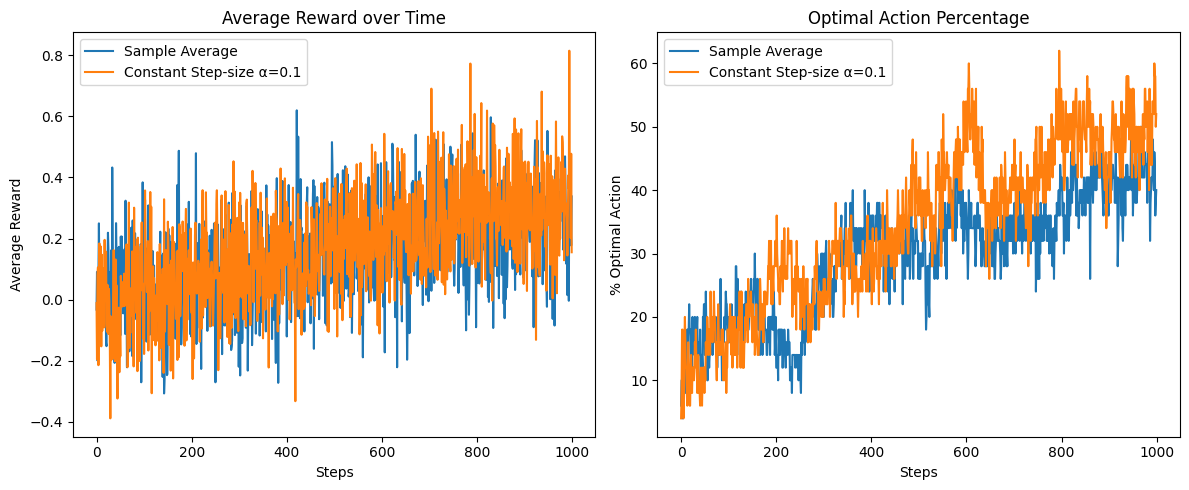

In [6]:
for run in range(runs):
    q_true = np.zeros(k)                   # true action values
    q_est_sample = np.zeros(k)            # estimated values (sample-average)
    q_est_const = np.zeros(k)             # estimated values (constant step-size)
    action_count = np.zeros(k)            # for sample-average
    optimal_action = 0                    # all q*(a) are initially equal

    for t in range(steps):
        # Random walk update for nonstationary q*
        q_true += np.random.normal(0, walk_std, k)
        optimal_action = np.argmax(q_true)

        # --- Sample-Average Method ---
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(q_est_sample)
        reward = np.random.normal(q_true[action], reward_std)
        action_count[action] += 1
        q_est_sample[action] += (reward - q_est_sample[action]) / action_count[action]

        average_rewards_sample[t] += reward
        optimal_action_sample[t] += (action == optimal_action)

        # --- Constant Step-Size Method ---
        if np.random.rand() < epsilon:
            action_c = np.random.randint(k)
        else:
            action_c = np.argmax(q_est_const)
        reward_c = np.random.normal(q_true[action_c], reward_std)
        q_est_const[action_c] += alpha * (reward_c - q_est_const[action_c])

        average_rewards_const[t] += reward_c
        optimal_action_const[t] += (action_c == optimal_action)

# --- Averaging over runs ---
average_rewards_sample /= runs
optimal_action_sample = (optimal_action_sample / runs) * 100
average_rewards_const /= runs
optimal_action_const = (optimal_action_const / runs) * 100

# Plotting results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(average_rewards_sample, label="Sample Average")
plt.plot(average_rewards_const, label="Constant Step-size α=0.1")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward over Time")

plt.subplot(1, 2, 2)
plt.plot(optimal_action_sample, label="Sample Average")
plt.plot(optimal_action_const, label="Constant Step-size α=0.1")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()
plt.title("Optimal Action Percentage")

plt.tight_layout()
plt.show()